In [1]:
# Importar liberias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Convertir a pesos
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/Portafolios de inversión/Modulo 1/Repaso regresion lineal/'
df = pd.read_csv(data_path + 'weight-height.csv').sample(50).reset_index()
df['Height'] = np.round(df.Height * 2.54) / 100
df['Weight'] = np.round(df.Weight * 0.453592)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


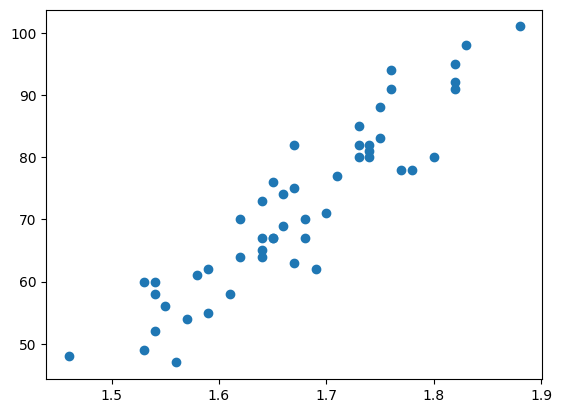

In [10]:
# Grafique peso vs altura
plt.scatter(df.Height, df.Weight)

# Llega alguien de 1.7 metros  ¿cuanto peso tiene?

Idea 1: centimetros = peso


In [11]:
# Crea una columna de centimetros, altura * 100 - 100
df["centimeters"] = df.Height * 100 - 100
df.head()

,index,Gender,Height,Weight,centimeters
0,9571,Female,1.65,67.0,65.0
1,9664,Female,1.62,70.0,62.0
2,6058,Female,1.64,64.0,64.0
3,8996,Female,1.59,55.0,59.0
4,2784,Male,1.75,88.0,75.0


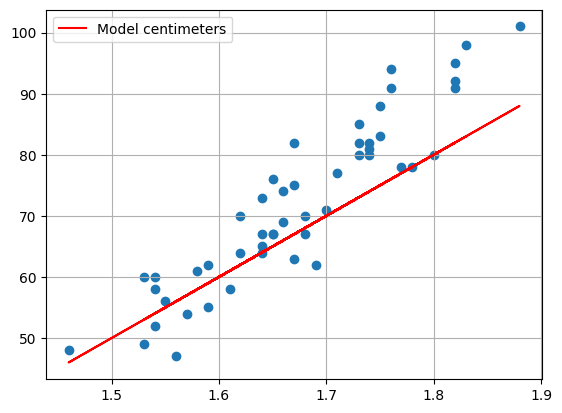

In [12]:
# Grafique el modelo
# Grafique peso vs altura
plt.scatter(df.Height, df.Weight)
plt.plot(df.Height, df.centimeters, c="red", label="Model centimeters")
plt.legend()
plt.grid()

### ¿Qué tan bueno es mi modelo? Saquemos el error

In [14]:
# Error
np.std(df.Weight - df.centimeters)

6.116992725187762

In [16]:
error_cuadratico = np.var(df.Weight - df.centimeters)
error_cuadratico

37.4176

In [19]:
# error usando el primedio
error_promedio = np.var(df.Weight - df.Height.mean())

In [20]:
(error_promedio - error_cuadratico)/error_promedio

0.7982643801111073

La intuición de esta métrica es --> que tan mejor es mi modelo a si simplemente no tengo modelo y uso el promedio

$$R^2 = \frac{ErrorPromedio - ErrorModelo}{ErrorPromedio} $$

In [ ]:
# Usa Sklearn

## ¿Podemos mejorar este modelo? Si podemos, un método sencillo es calcular una regresión lineal


$$h(x) = \theta_0 + \theta_1 * x $$



$$J(\theta)  ={\frac{1}{2} \sum (h(x) - y)^2} $$

$$\frac{\partial }{\partial \theta_i} J(\theta)  = \frac{\partial }{\partial \theta_i} \frac{1}{2}(h(x) - y)^2$$


Reptir hasta converger {
$$ \theta_i  := \theta_i - \alpha * \frac{\partial }{\partial \theta_i} J(\theta) $$

}



Ya con el gradiente calculado tenemos  {
$$ \theta_i  := \theta_i - \alpha * (h(x) - y) * x_i $$

}



In [21]:
def cost_function(X, y, theta):
    m = len(y)

    J = np.sum((X.dot(theta)-y)**2)/2/m

    return J

In [22]:
def gradient_descent(X, y, theta, alpha, iterations):

    cost_history = [0] * iterations

    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history


In [23]:
# Agrega la columna de intercepto
X_df = df[['Height']]
X_df['intercept'] = 1
y_df = df[['Weight']]

alpha = 0.1

## Transforma a numpy los arrays
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([40, 40])
m = len(X_df)

<ipython-input-23-0426cc32726c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['intercept'] = 1


$$Weight = 40 + 40 X $$

In [24]:
(t, c) = gradient_descent(X,y,theta, 0.5, 1500)

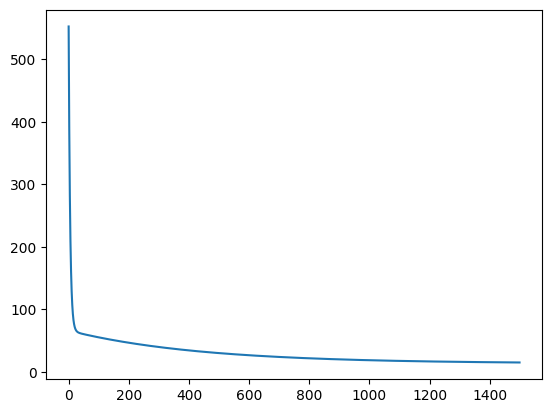

In [25]:
# Grafique el costo por iteración
plt.plot(c)

In [27]:
# ¿Cómo quedo el modelo?
t

array([ 114.98229335, -120.31908809])

Escriba la formula
$$Weight = \theta_0 + \theta_1 *altura$$

$$Weight = -108 + 107*altura$$


In [ ]:
# Prediga usando el modelo


### Ejemplo, Alguien mide 1.7 metros de altura ... ¿cuanto pesa?

In [28]:
def peso(x):
    return t[1] + t[0] * x

In [30]:
# Grafique el modelo y comparelo con los otros
peso(1.7)

75.15081060758303

In [31]:
#mide 1.95, cuanto pesa?
peso(1.95)

103.89638394563099

In [33]:
# Error del segundo modelo
df["modelo2"] = t[1] + t[0] * df.Height
df.head()

,index,Gender,Height,Weight,centimeters,modelo2
0,9571,Female,1.65,67.0,65.0,69.401696
1,9664,Female,1.62,70.0,62.0,65.952227
2,6058,Female,1.64,64.0,64.0,68.251873
3,8996,Female,1.59,55.0,59.0,62.502758
4,2784,Male,1.75,88.0,75.0,80.899925


In [34]:
np.std(df.Weight - df.modelo2)

5.507338016105622

In [35]:
np.std(df.Weight - df.centimeters)

6.116992725187762

In [36]:
# Calcula el R2 del segundo modelo
error_cuadratico_mod2 = np.var(df.Weight - df.modelo2)
(error_promedio - error_cuadratico_mod2)/error_promedio

0.8364727535732345

In [ ]:
# Error cuadratico medio del segundo modelo con sklearn


# Ahora usa sklearn para calcular la regresión lineal

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
X = df[["Height"]]
y = df[["Weight"]]

In [39]:
model = LinearRegression().fit(X, y)

In [40]:
model.coef_

array([[134.48027169]])

In [41]:
model.intercept_

array([-153.02618269])

**Escriba la ecuación del modelo**
$$Peso = -153.03 + 134.48 * Altura $$
$$y = \beta_0 + \beta_1 * X$$

In [42]:
df["sklearn_model1"] = model.predict(X)
df.head()

,index,Gender,Height,Weight,centimeters,modelo2,sklearn_model1
0,9571,Female,1.65,67.0,65.0,69.401696,68.866266
1,9664,Female,1.62,70.0,62.0,65.952227,64.831857
2,6058,Female,1.64,64.0,64.0,68.251873,67.521463
3,8996,Female,1.59,55.0,59.0,62.502758,60.797449
4,2784,Male,1.75,88.0,75.0,80.899925,82.314293


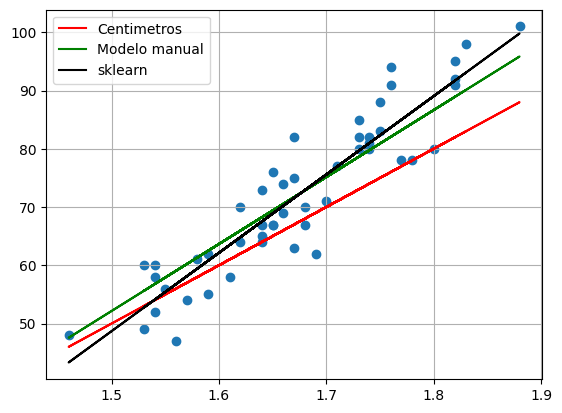

In [44]:
# Grafique el modelo y comparelo con los otros
plt.scatter(df.Height, df.Weight)
plt.plot(df.Height, df.centimeters, c="red", label="Centimetros")
plt.plot(df.Height, df.modelo2, c="green", label="Modelo manual")
plt.plot(df.Height, df.sklearn_model1, c="black", label="sklearn")
plt.legend()
plt.grid()


# Ahora usa sklearn para regresión lineal multiple

$$h(x) = \theta_0 + \theta_1 * x $$
$$Peso = \theta_0 + \theta_1 * altura $$


In [46]:
# Crea una columna dummy para el genero
df["is_male"] = df.Gender == "Male"

In [47]:
X = df[["is_male", "Height"]]
y = df[["Weight"]]

In [48]:
model = LinearRegression().fit(X, y)

In [49]:
model.intercept_

array([-105.49806049])

In [50]:
model.coef_

array([[  8.24529258, 103.61819682]])

In [ ]:
# Intercepto


In [ ]:
# Coeficiente


Escriba el modelo


$$Weight = -94 + 9.43 * isMale + 97*altura $$


In [51]:
# Prediga el modelo
df["modelo_multiple"] = model.predict(X)

In [52]:
# Error del modelo
np.std(df.Weight - df.modelo_multiple)

4.283645267303487

In [53]:
# Crea una lista con colores
c = ["red" if i == "Male" else "blue" for i in df.Gender]

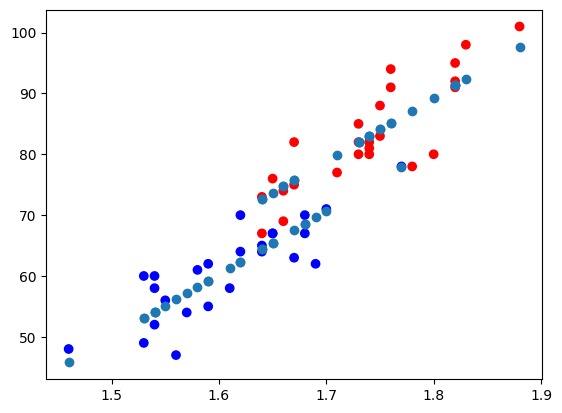

In [55]:
# Grafique los modelos
plt.scatter(df.Height, df.Weight, c=c)
plt.scatter(df.Height, df.modelo_multiple)

In [56]:
# Alguien mide 1.7, ¿cuanto pesa?
df.head()

,index,Gender,Height,Weight,centimeters,modelo2,sklearn_model1,is_male,modelo_multiple
0,9571,Female,1.65,67.0,65.0,69.401696,68.866266,False,65.471964
1,9664,Female,1.62,70.0,62.0,65.952227,64.831857,False,62.363418
2,6058,Female,1.64,64.0,64.0,68.251873,67.521463,False,64.435782
3,8996,Female,1.59,55.0,59.0,62.502758,60.797449,False,59.254872
4,2784,Male,1.75,88.0,75.0,80.899925,82.314293,True,84.079077


In [ ]:
# Compare error de los 3 modelos